In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

In [14]:
CURRENT_DIR = Path.cwd()
PARENT_DIR = CURRENT_DIR.parent
DATA_DIR = PARENT_DIR / "T00_data"
print(CURRENT_DIR)
print(DATA_DIR)

c:\Users\admin\Coding\research\weld-ml\src\P02_data\T01_explore
c:\Users\admin\Coding\research\weld-ml\src\P02_data\T00_data


In [15]:
filepath = os.path.join(
    DATA_DIR, "residual_stress", "post_welding", "Post_RS (AA5052+AA6061)_v2.xlsx"
)
post = pd.read_excel(filepath)

# Insert index to the original row number
post.insert(0, "idx_excel", range(2, 2 + post.shape[0]))

In [18]:
post

,idx_excel,Sigma(x),Tau(xy),FWHM,Gamma(Ri),Gamma(Rv),Comment 1,Comment 2,Folder,Date,Time,Sigma(x) (Error),excluded
0,2,32,10,2.62,---,---,Sample 01_11,"R1400,W60,D10",FSW_Parn (post welding),2025-11-29,14:01:00,2,NaN
1,3,12,-4,2.64,---,---,Sample 01_12,"R1400,W60,D10",FSW_Parn (post welding),2025-11-29,14:06:00,2,NaN
2,4,13,-15,2.55,---,---,Sample 01_13,"R1400,W60,D10",FSW_Parn (post welding),2025-11-29,14:18:00,2,NaN
3,5,28,8,2.71,---,---,Sample 01_21,"R1400,W60,D10",FSW_Parn (post welding),2025-11-29,14:22:00,5,NaN
4,6,26,-3,2.56,---,---,Sample 01_22,"R1400,W60,D10",FSW_Parn (post welding),2025-11-29,14:25:00,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1131,6,11,2.43,---,---,Sample 54_62,"R1600,W80,D20",FSW_Parn (post welding),2025-12-06,00:56:00,2,NaN
1130,1132,-3,-16,2.47,---,---,Sample 54_63,"R1600,W80,D20",FSW_Parn (post welding),2025-12-06,00:58:00,9,NaN
1131,1133,21,-5,2.67,---,---,Sample 54_71,"R1600,W80,D20",FSW_Parn (post welding),2025-12-06,01:01:00,2,NaN
1132,1134,4,8,2.42,---,---,Sample 54_72,"R1600,W80,D20",FSW_Parn (post welding),2025-12-06,01:06:00,3,NaN


In [ ]:
# Split grade and sample no and location


def split_data_1(el):
    # Handle input format like this "Sample 01_11"
    # Split by space first and then by underscore
    sps = el.split(" ")[1].split("_")
    # The first part is sample no
    sample_no = int(sps[0])
    # The second part is location and section
    _str = sps[1]
    # The first character is location
    location = int(_str[0])
    # The second character is section
    _section = int(_str[1])
    if _section == 1:
        section = "AA6061"
    elif _section == 2:
        section = "Center"
    elif _section == 3:
        section = "AA5052"
    else:
        raise ValueError("Invalid section number")
    return section, sample_no, location


post[["section", "sample_no", "location"]] = post["Comment 1"].apply(
    lambda x: pd.Series(split_data_1(x))
)

In [ ]:
# Split data based on rotational speed, welding speed, dwell time


def split_data_2(el):
    sps = el.split(",")
    rotational_speed = int(sps[0][1:])
    welding_speed = int(sps[1][1:])
    dwell_time = int(sps[2][1:])
    return rotational_speed, welding_speed, dwell_time


post[["R", "W", "D"]] = post["Comment 2"].apply(lambda x: pd.Series(split_data_2(x)))

In [21]:
post.columns.values

array(['idx_excel', 'Sigma(x)', 'Tau(xy)', 'FWHM', 'Gamma(Ri)',
       'Gamma(Rv)', 'Comment 1', 'Comment 2', 'Folder', 'Date', 'Time',
       'Sigma(x) (Error)', 'excluded', 'section', 'sample_no', 'location',
       'R', 'W', 'D'], dtype=object)

In [22]:
cols = [
    "idx_excel",
    "section",
    "sample_no",
    "location",
    "R",
    "W",
    "D",
    "Sigma(x)",
    "FWHM",
]

dfm = post[cols]

<Axes: xlabel='location', ylabel='Sigma(x)'>

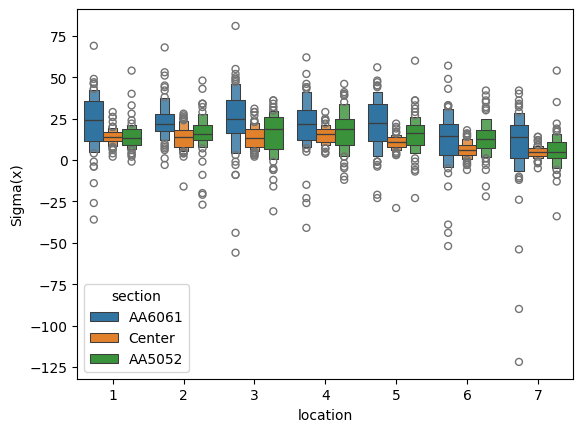

In [23]:
sns.boxenplot(data=dfm, x="location", y="Sigma(x)", hue="section")

In [24]:
# Save to excel

dfm.to_excel("S02_residual_stress_post_weld.xlsx", index=False)